Observations and Insights

1. With a correlation of 0.84, there is a positive correlation between average tumor volume and weight within the subject mice. 

2. Capomulin and Ramicane had the most data points out of all the drugs present in the study. 

3. Capomulin and Ramicane were also the most successful drugs in reducing the size of the tumors within the mice subjects.


Dependencies

In [111]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_data = "mouse_data.csv"
study_results = "study_results.csv"

# Read the mouse data and the study results
mouse_data_df = pd.read_csv(mouse_data)
study_results_df = pd.read_csv(study_results)

# Combine the data into a single dataset
mouse_study_df = pd.merge(mouse_data_df, study_results_df, on="Mouse ID")
mouse_study_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [112]:
study_results_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


Summary Statistics

In [113]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

mouse_data_updated_tv = mouse_study_df.groupby(['Drug Regimen']).agg({"Tumor Volume (mm3)" :["mean","median","var","std", "sem"]})
mouse_data_updated_tv

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

In [114]:
#tumor volume for each regimen
mice = mouse_study_df["Mouse ID"].unique()
drugs = mouse_study_df["Drug Regimen"].unique()
time = mouse_study_df["Timepoint"].unique()

num_mouse = len(mice)
num_drugs = len(drugs)
num_measurements = len(time)
num_samples = num_drugs * num_measurements

data_summary = pd.DataFrame({"Number of Mice": [num_mouse],
                         "Number of Drug Regimen Treatments": [num_drugs],
                         "Number of Time Measurements": [num_measurements],
                         "Number of Samples": [num_samples]})
data_summary

,Number of Mice,Number of Drug Regimen Treatments,Number of Time Measurements,Number of Samples
0,249,10,10,100


In [115]:
mean_volume = pd.DataFrame(round(mouse_study_df.groupby(['Drug Regimen']).mean()['Tumor Volume (mm3)'],2))
mean_volume = mean_volume.rename(columns={"Tumor Volume (mm3)":"Mean"})

median_volume = pd.DataFrame(round(mouse_study_df.groupby(['Drug Regimen']).median()['Tumor Volume (mm3)'],2))
median_volume = median_volume.rename(columns={"Tumor Volume (mm3)":"Median"})

variance = pd.DataFrame(round(mouse_study_df.groupby(['Drug Regimen']).var()['Tumor Volume (mm3)'],2))
variance = variance.rename(columns={"Tumor Volume (mm3)":"Variance"})

stdev = pd.DataFrame(round(mouse_study_df.groupby(['Drug Regimen']).std()['Tumor Volume (mm3)'],2))
stdev = stdev.rename(columns={"Tumor Volume (mm3)":"StDev"})

SEM = pd.DataFrame(round(mouse_study_df.groupby(['Drug Regimen']).sem()['Tumor Volume (mm3)'],2))
SEM = SEM.rename(columns={"Tumor Volume (mm3)":"SEM"})

summary_stat = [mean_volume, median_volume, variance, stdev, SEM]
summary_stat = pd.concat(summary_stat,axis=1,join='inner')
summary_stat

,Mean,Median,Variance,StDev,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.85,42.35,6.51,0.51
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [116]:
stat_analysis= pd.DataFrame(round(mouse_study_df.groupby(['Drug Regimen']).describe()['Tumor Volume (mm3)'],2))

stat_analysis

,count,mean,std,min,25%,50%,75%,max
Drug Regimen,,,,,,,,
Capomulin,230.0,40.68,4.99,23.34,37.69,41.56,45.00,48.16
Ceftamin,178.0,52.59,6.27,45.00,47.21,51.78,56.80,68.92
Infubinol,178.0,52.88,6.57,36.32,47.31,51.82,57.31,72.23
Ketapril,188.0,55.24,8.28,45.00,48.23,53.70,60.87,78.57
Naftisol,186.0,54.33,8.13,45.00,47.29,52.51,59.96,76.67
Placebo,181.0,54.03,7.82,45.00,47.46,52.29,59.92,73.21
Propriva,161.0,52.32,6.51,45.00,47.08,50.85,56.18,72.46
Ramicane,228.0,40.22,4.85,22.05,36.67,40.67,45.00,47.62
Stelasyn,181.0,54.23,7.71,45.00,48.05,52.43,58.72,75.12


Bar Plots

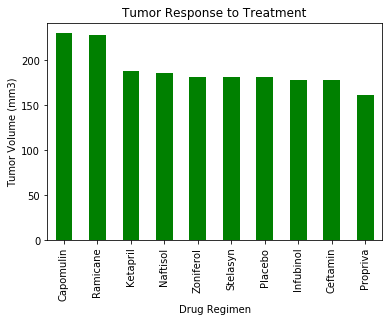

In [117]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
treatment_reg = mouse_study_df["Drug Regimen"].value_counts()
treatment_bar_graph = treatment_reg.plot(kind="bar", facecolor="green")

plt.title('Tumor Response to Treatment')
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.savefig('PyMaBarplot1')

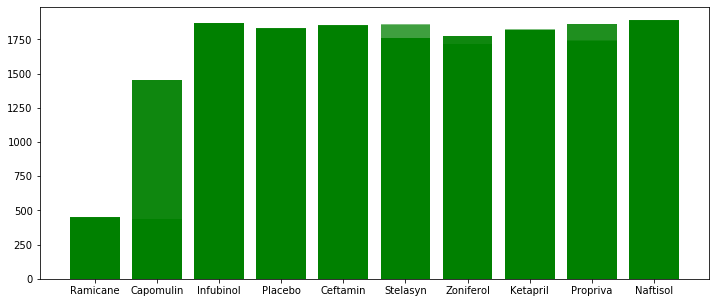

In [118]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
x_axis = np.arange(len(mouse_study_df))
tick_locations = [value for value in x_axis]

plt.figure(figsize=(12,5))
plt.bar(mouse_study_df["Drug Regimen"], x_axis, color=['g'], alpha=0.5, align="center")

plt.savefig('PymaBarplot2')
plt.show()

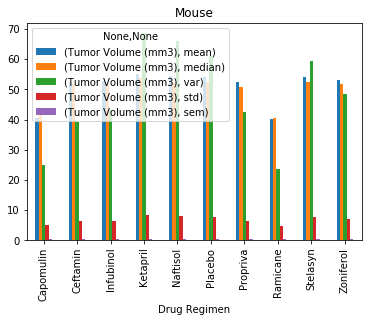

In [119]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
mouse_data_updated_tv = mouse_study_df.groupby(['Drug Regimen']).agg({"Tumor Volume (mm3)" :["mean","median","var","std", "sem"]})
mouse_data_updated_tv.plot.bar()
plt.title('Mouse')

plt.savefig('PymaBarplot3')
plt.show()

Stats plot

In [120]:
mean_numpy = np.mean(summary_stat)
print(f"The mean is {mean_numpy}")

median_numpy = np.median(summary_stat)
print(f"The median is {median_numpy}")

mode_scipy = sts.mode(summary_stat)
print(f"The mode is {mode_scipy}")



The mean is Mean        50.976
Median      49.943
Variance    47.708
StDev        6.810
SEM          0.499
dtype: float64
The median is 40.675
The mode is ModeResult(mode=array([[40.22, 51.82, 23.49,  4.85,  0.6 ]]), count=array([[1, 2, 1, 1, 2]]))


C:\Users\bthom\Anaconda3\envs\PythonData\lib\site-packages\scipy\stats\stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


NormaltestResult(statistic=array([6.58585839, 6.74250938, 0.97058056, 0.90103385, 2.13960203]), pvalue=array([0.03714489, 0.03434652, 0.6155185 , 0.63729863, 0.34307678]))


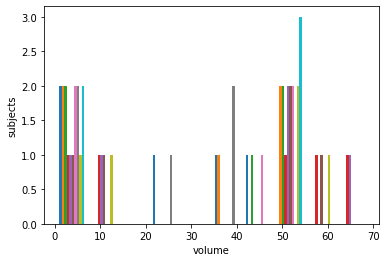

In [121]:
# Characterize the data set using matplotlib and stats.normaltest
plt.hist(summary_stat)
plt.xlabel('volume')
plt.ylabel('subjects')

print(sts.normaltest(summary_stat.sample(10)))
plt.savefig('PymaBarplot4')
plt.show()

In [122]:
# Demonstrate calculating the variance and standard deviation using the different modules
var_numpy = np.var(summary_stat,ddof = 0)
print(f"The variance using the NumPy module is {var_numpy}")

sd_numpy = np.std(summary_stat,ddof = 0)
print(f"The standard deviation using the NumPy module is {sd_numpy}")

The variance using the NumPy module is Mean         28.420784
Median       19.990481
Variance    231.997716
StDev         1.335220
SEM           0.009409
dtype: float64
The standard deviation using the NumPy module is Mean         5.331115
Median       4.471072
Variance    15.231471
StDev        1.155517
SEM          0.097000
dtype: float64


In [123]:
# Demonstrate calculating the z-scores using SciPy
z_scipy = sts.zscore(summary_stat)
print(f"The z-scores using the SciPy module are {z_scipy}")

The z-scores using the SciPy module are [[-1.93130341 -1.87494203 -1.49414325 -1.57505228 -1.74226804]
 [ 0.30275094  0.41086347 -0.5526715  -0.4673232  -0.29896907]
 [ 0.35714857  0.41980988 -0.3005619  -0.2076992  -0.09278351]
 [ 0.79983272  0.84029073  1.36835107  1.27215761  1.04123711]
 [ 0.62913672  0.5741353   1.21209565  1.14234561  1.04123711]
 [ 0.57286331  0.52493009  0.88382795  0.87406747  0.83505155]
 [ 0.25210487  0.20285965 -0.35177167 -0.259624    0.11340206]
 [-2.0175893  -2.07399945 -1.58999742 -1.69621015 -1.84536082]
 [ 0.61037891  0.55624249  0.77090386  0.77887201  0.73195876]
 [ 0.42467666  0.41980988  0.05396721  0.13846613  0.21649485]]


Pie Plots

In [124]:
# Find data to generate a pie plot showing the distribution of female versus male mice using pandas
bygender = mouse_data_df.groupby("Sex").count()

#bygender = mouse_metadata["Sex"].value_count()
bygender

,Mouse ID,Drug Regimen,Age_months,Weight (g)
Sex,,,,
Female,124,124,124,124
Male,125,125,125,125


In [125]:
labels = [mouse_data_df['Sex'].unique()]
newlist = list(bygender.index)
newlist

['Female', 'Male']

In [126]:
sizes = [bygender["Mouse ID"]]
sizes

[Sex
 Female    124
 Male      125
 Name: Mouse ID, dtype: int64]

C:\Users\bthom\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  if __name__ == '__main__':


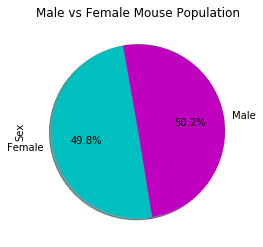

In [127]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

#Pie Plots – you can use the meta data for this one not merged – use value count or group by gender

# The colors of each section of the pie chart
colors = ["c", "m"]

plt.pie(sizes, labels=newlist, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=100)
plt.title('Male vs Female Mouse Population')
plt.ylabel('Sex')

plt.savefig('PymaPiechart1')
plt.show()

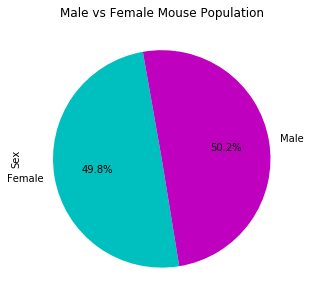

In [128]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

secondpie = bygender["Mouse ID"].plot.pie(y='sizes', figsize=(5, 5), autopct="%1.1f%%", colors= ['c', 'm'], startangle=100)
plt.title('Male vs Female Mouse Population')
plt.ylabel('Sex')

plt.savefig('PymaPiechart2')
plt.show()

In [129]:

#Generate data for all female and male mice for all drug regimens
mouse_study_df['Sex'].value_counts()

Male      958
Female    935
Name: Sex, dtype: int64

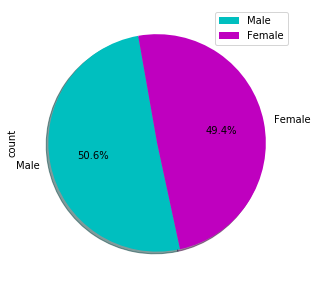

In [130]:
#Generate pie plot for all female and male for all drug regimens
gender_df = pd.DataFrame({'count':[958, 935]},
                   index = ['Male', 'Female'])
gender_pie = gender_df.plot.pie(y='count', figsize=(5, 5),autopct="%1.1f%%",colors = ['c', 'm'], shadow=True, startangle=100)
plt.savefig('PymaPiechart3')

C:\Users\bthom\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


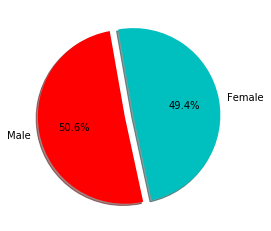

In [131]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot for all drug regimens
gender_count = pd.DataFrame(mouse_study_df["Sex"].value_counts())
labels = ["Male", "Female"]
colors = ['r','c']
explode = (0.1,0)
plt.pie(gender_count, explode=explode, labels=labels, autopct="%1.1f%%", shadow=True, startangle=100,colors=colors)
plt.savefig('PymaPiechart4')

In [132]:
#tumor_median_df = mouse_study_df.loc[:,['Drug Regimen', 'Sex']]
#tumor_median_df

mouse_study_pie_df = mouse_study_df.loc[:,['Drug Regimen','Sex']]
mouse_study_pie_df


,Drug Regimen,Sex
0,Ramicane,Male
1,Ramicane,Male
2,Ramicane,Male
3,Ramicane,Male
4,Ramicane,Male
...,...,...
1888,Naftisol,Male
1889,Naftisol,Male
1890,Naftisol,Male
1891,Naftisol,Male


In [133]:
mouse_study_df['Sex'].value_counts()


Male      958
Female    935
Name: Sex, dtype: int64

In [134]:
drug = ['Capomulin', 'Ceftamin', 'Infubinol',
         'Ketapril', 'Naftisol', 'Placebo', 'Propriva',
         'Ramicane', 'Stelasyn', 'Zoniferol']
labels_gender = ['Male', 'Female','Male', 'Female','Male', 'Female','Male', 'Female','Male', 'Female','Male', 'Female','Male', 'Female','Male', 'Female','Male', 'Female','Male', 'Female']
sizes = [0.82,1.4,1.6,1.9,1.9,1.8,1.4,0.81,1.8,1.7]
colors = ['red', 'blue', 'green', 'yellow', 'orange',
         'purple', 'brown', 'grey', 'pink', 'aqua']
colors_gender = ['red', 'blue', 'green', 'yellow', 'orange',
         'purple', 'brown', 'grey', 'pink', 'aqua']
explode = (0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2)
explode_gender = (0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1)
sizes_gender = [0.82,1.4,1.6,1.9,1.9,1.8,1.4,0.81,1.8,1.7]

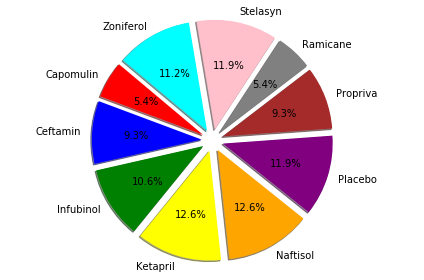

In [135]:
plt.pie(sizes, explode=explode, labels=drug, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140, radius=2)

plt.axis('equal')
plt.tight_layout()

plt.savefig('PymaPiechart5')
plt.show()

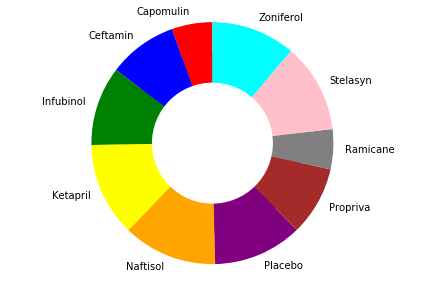

In [136]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
import matplotlib.pyplot as plt
drugs = ['Capomulin', 'Ceftamin', 'Infubinol',
         'Ketapril', 'Naftisol', 'Placebo', 'Propriva',
         'Ramicane', 'Stelasyn', 'Zoniferol']

labels_gender = ['Male', 'Female','Male', 'Female','Male', 'Female','Male', 'Female','Male', 'Female','Male', 'Female','Male', 'Female','Male', 'Female','Male', 'Female','Male', 'Female']
sizes = [0.82,1.4,1.6,1.9,1.9,1.8,1.4,0.81,1.8,1.7]
colors = ['red', 'blue', 'green', 'yellow', 'orange',
         'purple', 'brown', 'grey', 'pink', 'aqua']
colors_gender = ['red', 'blue', 'green', 'yellow', 'orange',
         'purple', 'brown', 'grey', 'pink', 'aqua']
explode = (0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2)
explode_gender = (0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1)
sizes_gender = [0.82,1.4,1.6,1.9,1.9,1.8,1.4,0.81,1.8,1.7]

# Plot
plt.pie(sizes, labels=drugs, colors=colors, startangle=90,frame=True)
plt.pie(sizes_gender,colors=colors_gender,radius=0.75,startangle=90)
centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
 
plt.axis('equal')
plt.tight_layout()


plt.savefig('PymaPiechart6')
plt.show()

Quartiles, outliers and boxplots

In [137]:
cap_df = mouse_study_df.loc[mouse_study_df["Drug Regimen"] == "Capomulin",:]
ram_df = mouse_study_df.loc[mouse_study_df["Drug Regimen"] == "Ramicane", :]
inf_df = mouse_study_df.loc[mouse_study_df["Drug Regimen"] == "Infubinol", :]
ceft_df = mouse_study_df.loc[mouse_study_df["Drug Regimen"] == "Ceftamin", :]
cap_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [138]:
caplast = cap_df.groupby('Mouse ID').max()['Timepoint']
caplastvol = pd.DataFrame(caplast)
caplastmerge = pd.merge(caplastvol, mouse_study_df, on=("Mouse ID","Timepoint"),how="left")
caplastmerge.head(5)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [139]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
#Calculate the IQR and quantitatively determine if there are any potential outliers.
# Start by getting the last (greatest) timepoint for each mouse

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

# Quantitatively determine capomulin outliers
# treatments - Capomulin, Ramicane, Infubinol, and Ceftamin

tumors = caplastmerge["Tumor Volume (mm3)"]

quartiles = tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

#print(f"The lower quartile of temperatures is: {lowerq}")
#print(f"The upper quartile of temperatures is: {upperq}")
#print(f"The interquartile range of temperatures is: {iqr}")
#print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Capomulin potential outliers could be values below {lower_bound} and above {upper_bound} could be outliers.")

Capomulin potential outliers could be values below 20.70456164999999 and above 51.83201549 could be outliers.


In [140]:
ramlast = ram_df.groupby('Mouse ID').max()['Timepoint']
ramlastvol = pd.DataFrame(ramlast)
ramlastmerge = pd.merge(ramlastvol, mouse_study_df, on=("Mouse ID","Timepoint"),how="left")
ramlastmerge.head(10)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,Ramicane,Male,3,22,38.407618,1
1,a444,45,Ramicane,Female,10,25,43.047543,0
2,a520,45,Ramicane,Male,13,21,38.810366,1
3,a644,45,Ramicane,Female,7,17,32.978522,1
4,c458,30,Ramicane,Female,23,20,38.342008,2
5,c758,45,Ramicane,Male,9,17,33.397653,1
6,d251,45,Ramicane,Female,8,19,37.311236,2
7,e662,45,Ramicane,Male,8,24,40.659006,2
8,g791,45,Ramicane,Male,11,16,29.128472,1
9,i177,45,Ramicane,Male,10,18,33.562402,3


In [141]:
#Ramicane
tumors2 = ramlastmerge["Tumor Volume (mm3)"]

quartiles2 = tumors2.quantile([.25,.5,.75])
lowerq2 = quartiles2[0.25]
upperq2 = quartiles2[0.75]
iqr2 = upperq2-lowerq2

lower_bound2 = lowerq2 - (1.5*iqr2)
upper_bound2 = upperq2 + (1.5*iqr2)
print(f"Ramicane potential outliers could be values below {lower_bound2} and above {upper_bound2} could be outliers.")

Ramicane potential outliers could be values below 17.912664470000003 and above 54.30681135 could be outliers.


In [142]:
inflast = inf_df.groupby('Mouse ID').max()['Timepoint']
inflastvol = pd.DataFrame(inflast)
inflastmerge = pd.merge(inflastvol, mouse_study_df, on=("Mouse ID","Timepoint"),how="left")
inflastmerge.head(10)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a577,30,Infubinol,Female,6,25,57.031862,2
3,a685,45,Infubinol,Male,8,30,66.083066,3
4,c139,45,Infubinol,Male,11,28,72.226731,2
5,c326,5,Infubinol,Female,18,25,36.321346,0
6,c895,30,Infubinol,Female,7,29,60.969711,2
7,e476,45,Infubinol,Male,23,26,62.435404,1
8,f345,45,Infubinol,Male,23,26,60.918767,1
9,i386,40,Infubinol,Female,23,29,67.289621,4


In [143]:
#Infubinol
tumors3 = inflastmerge["Tumor Volume (mm3)"]

quartiles3 = tumors3.quantile([.25,.5,.75])
lowerq3 = quartiles3[0.25]
upperq3 = quartiles3[0.75]
iqr3 = upperq3-lowerq3

lower_bound3 = lowerq3 - (1.5*iqr3)
upper_bound3 = upperq3 + (1.5*iqr3)
print(f"Infubinol potential outliers could be values below {lower_bound3} and above {upper_bound3} could be outliers.")

Infubinol potential outliers could be values below 36.83290494999999 and above 82.74144559000001 could be outliers.


In [144]:
ceftlast = ceft_df.groupby('Mouse ID').max()['Timepoint']
ceftlastvol = pd.DataFrame(ceftlast)
ceftlastmerge = pd.merge(ceftlastvol, mouse_study_df, on=("Mouse ID","Timepoint"),how="left")
ceftlastmerge.head(10)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2
5,h531,5,Ceftamin,Male,5,27,47.784682,0
6,j296,45,Ceftamin,Female,24,30,61.849023,3
7,k210,45,Ceftamin,Male,15,28,68.923185,3
8,l471,45,Ceftamin,Female,7,28,67.748662,1
9,l490,30,Ceftamin,Male,24,26,57.918381,3


In [145]:
#Ceftamin
tumors4 = ceftlastmerge["Tumor Volume (mm3)"]

quartiles4 = tumors4.quantile([.25,.5,.75])
lowerq4 = quartiles4[0.25]
upperq4 = quartiles4[0.75]
iqr4 = upperq4-lowerq4

lower_bound4 = lowerq4 - (1.5*iqr4)
upper_bound4 = upperq4 + (1.5*iqr4)
print(f"Ceftamin potential outliers could be values below {lower_bound4} and above {upper_bound4} could be outliers.")

Ceftamin potential outliers could be values below 25.355449580000002 and above 87.66645829999999 could be outliers.


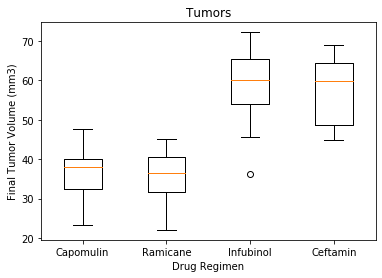

In [146]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# The second example again looks at the LAX temperature data set and computes quantiles

data_to_plot = [tumors, tumors2, tumors3, tumors4]

fig1, ax1 = plt.subplots()
ax1.set_title('Tumors')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')

ax1.boxplot(data_to_plot, labels=["Capomulin","Ramicane","Infubinol","Ceftamin",])

plt.savefig('PymaBoxplot')
plt.show()

Line Plot

In [147]:
forline_df = cap_df.loc[cap_df["Mouse ID"] == "l509",:]
forline_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
371,l509,Capomulin,Male,17,21,0,45.000000,0
372,l509,Capomulin,Male,17,21,5,45.851193,0
373,l509,Capomulin,Male,17,21,10,46.759074,0
374,l509,Capomulin,Male,17,21,15,47.488599,1
375,l509,Capomulin,Male,17,21,20,48.070452,2


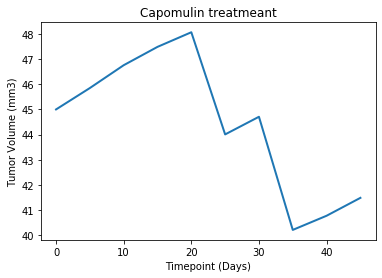

In [148]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

x_axisTP = forline_df["Timepoint"]
tumsiz = forline_df["Tumor Volume (mm3)"]

plt.title('Capomulin treatmeant')
plt.plot(x_axisTP, tumsiz,linewidth=2, markersize=12)
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

plt.savefig('PymaLinechart')
plt.show()

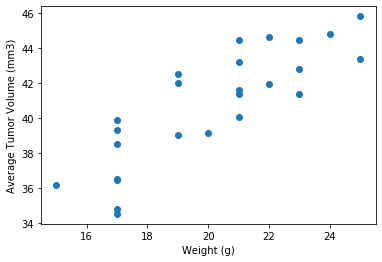

In [149]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capavg = cap_df.groupby(['Mouse ID']).mean()
plt.scatter(capavg['Weight (g)'],capavg['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.savefig('PymaScatterplot')
plt.show()

In [150]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
corr=round(st.pearsonr(capavg['Weight (g)'],capavg['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {corr}")

The correlation between mouse weight and average tumor volume is 0.84


In [151]:
model=st.linregress(capavg['Weight (g)'],capavg['Tumor Volume (mm3)'])
model

LinregressResult(slope=0.9544396890241045, intercept=21.552160532685015, rvalue=0.8419363424694718, pvalue=1.3225722434712642e-07, stderr=0.1275435903320134)

In [152]:
#capavg['Weight (g)']
mslope = 0.9544396890241045
bintercept = 21.552160532685015

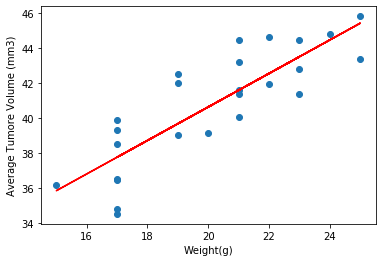

In [153]:
#linear regression model for mouse weight and average tumor volume for the Capomulin regimen
y_values = capavg['Weight (g)']*mslope+bintercept
plt.scatter(capavg['Weight (g)'],capavg['Tumor Volume (mm3)'])
plt.plot(capavg['Weight (g)'],y_values,color="red")
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumore Volume (mm3)')

plt.savefig('PymaLinearRegression')
plt.show()